Last week, we learned about the mechanics of two of the most popular clustering algorithms, k-means and DBSCAN. Before that, we learned how to take a high dimensional data set and project it in to a lower dimensions while maintinaing the total variance in the data with PCA. Today, we will put all this together with some code.

## K-Means

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

We will start off by making gaussian blobs. This will create point sets that are ball shaped that tend to have more points closer to the center of the blob and less as we move further away from the center. Indeed, the density of the blob is dictated by a Gaussian distribution in which we can specify various parameters of the distribution.



In [2]:
D, cluster_labels = make_blobs(n_samples = 500, centers=3, cluster_std=0.8, random_state=0)
# if you want to create points in higher dimensions than 2 you can use the n_features parameter.
# D, cluster_labels = make_blobs(n_samples = 500, centers=3, cluster_std=0.8, random_state=0, n_features=3)

In [3]:
D.shape

(500, 2)

In [4]:
cluster_labels

array([0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0,

Text(0.5, 1.0, '2-dimensional clusters')

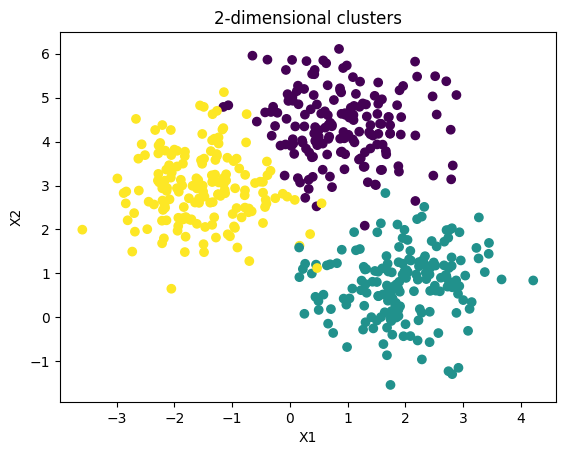

In [5]:
plt.scatter(D[:,0], D[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2-dimensional clusters')

You can see that these clusters looks convex and ball shaped.

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# k-means++ algorithm is a improved k-means algorithm which basically uses a better centroid initialization technique: 
# Basically uses a probabilistic method to select initial centroids in a more spread-out way:
    # 1. Choose the first centroid randomly from the data.
    # 2. For each remaining centroid, pick the next point with probability proportional to its squared distance from the nearest chosen centroid.
    # 3. Continue until k centroids are selected.
# if you want you can also pass 'random' for the init parameter

In [8]:
pred_cluster_labels_3 = kmeans.fit_predict(D) # Index of the cluster each sample belongs to.
pred_cluster_labels_3 = kmeans.fit_predict(D) # Index of the cluster each sample belongs to.

Now we have some labels. Let's take a look at them!



In [12]:
pred_cluster_labels_3[:100]

array([2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1,
       1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0,
       0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2], dtype=int32)

In [13]:
kmeans.cluster_centers_  # Coordinates of cluster centers.

array([[-1.55500135,  2.96109343],
       [ 1.92615725,  0.78390257],
       [ 0.88763766,  4.3727351 ]])

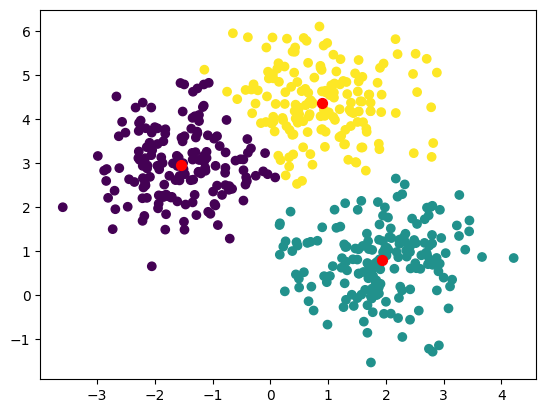

In [14]:
plt.scatter(D[:,0], D[:,1], c=pred_cluster_labels_3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

Look like this worked pretty well. he centers look to be in the centers of the clusters and note that while the colors changed, the points that are in each cluster are the same. 

For now, we will eyeball (but later in the week, we will learn how to quanity the quality the result).

We spoke last time of the functon that we are trying to minimize with k-means.

Given a clustering, we can compute the value of the function. sklearn calls it 'inertia'

In [15]:
kmeans.inertia_

594.7636472067953

Note that while we are trying to minimize inertia, we have to be a bit careful with blindly minizing that number. For example, it seems that we got the "correct" answer with 3 clusters, but what if we try with 4 clusters. Do you think we can reducde the objective function?



In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
pred_cluster_labels = kmeans.fit_predict(D)

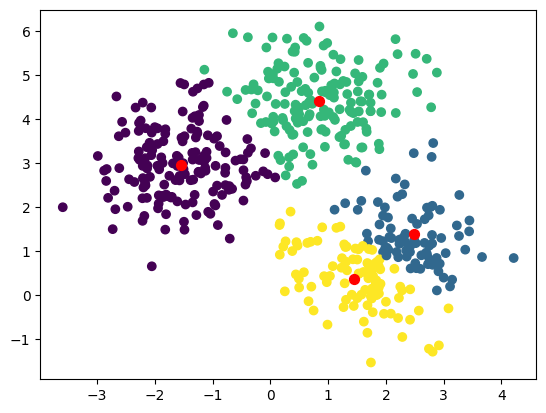

In [17]:
plt.scatter(D[:,0], D[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [18]:
kmeans.inertia_

509.77513492875755

we reduced the value of the objective function, but, it didn't really give us a "better" clustering. So, how do we pick a good k? Well for this example, we generated the data and know what the correct k is, but in general, we don't. So, one way that in practice that we decide k is called the "**elbo method**". We will plot the inertia for various k's and then pick the point when the inertia stops rapidly improving. So for example

In [19]:

max_clusters = 50
inertias = np.zeros(50)
cluster_range = range(1, max_clusters)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit_predict(D)
    inertias[i] = kmeans.inertia_

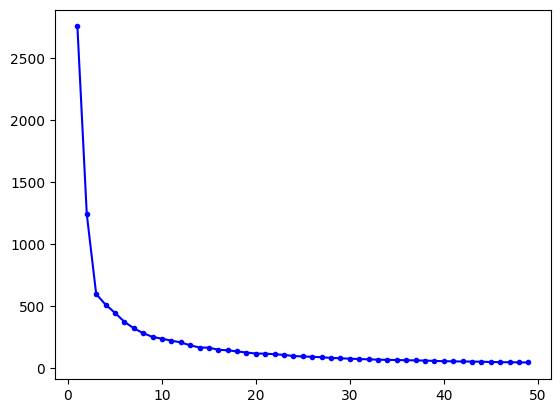

In [20]:
plt.plot(cluster_range, inertias[cluster_range], c='b', marker='.')


So, notice that we see a huge drop in the objective function value from adding clusters until we hit 3. But after, we are only getting a small improvement. So, we would pick 3 clusters because it is the smallest number of clusters that we can have before we stop seeing that substaintail improvement.

While this elbow method **doesn't have any gurantess**, it is, in practice, what people tend to do becuase it works pretty well.

Next, let's play around with the synthetically generated data sets. First, let's see what happens if we use different standard deviations for our blobs

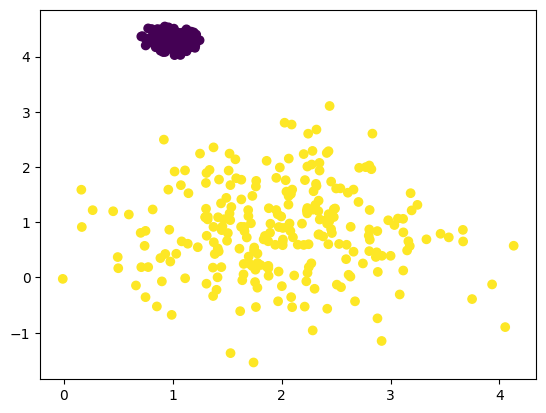

In [21]:
D, labels = make_blobs(n_samples=500, centers=2, cluster_std=[.1, .8], random_state=0)
plt.scatter(D[:,0], D[:,1], c=labels)

and we can still cluster as we did before.

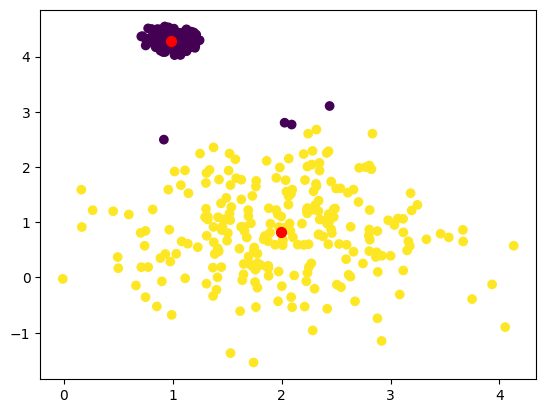

In [22]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(D)

centers = kmeans.cluster_centers_
plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')

But notice that some of the points at the top of the purple cluster are ending up in the wrong cluster! Question Why do you think that is?

Let's explore this further by creating a lot of overlap between the clusters:

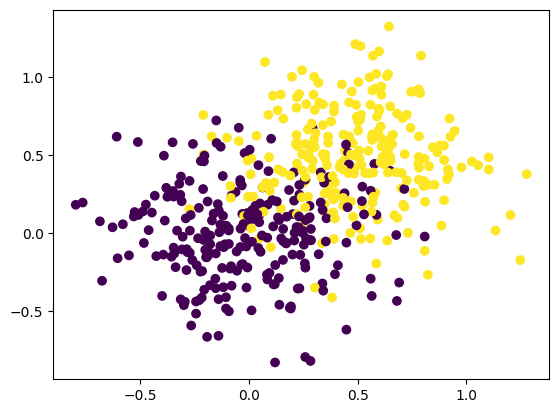

In [23]:
D, labels = make_blobs(n_samples=500, centers=[[0,0], [.5, .5]], cluster_std=.3, random_state=0)
plt.scatter(D[:,0], D[:,1], c=labels)

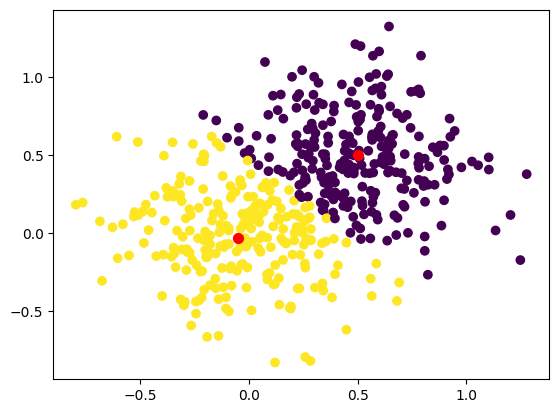

In [24]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(D)

centers = kmeans.cluster_centers_
plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')

Here is the takeaways from this.

1. k-means works well when our clusters are ball shaped.
2. We can use elbow method to pick a good k.
3. If your clusters overlap (that is, clusters are not well separated, we will have some issues with k-means clustering, where points will end up in wrong cluster.)

**Let's do few more examples.**

In [25]:
from sklearn.datasets import make_moons
X, cluster_labels = make_moons(n_samples=500, noise=0.1)

Text(0, 0.5, 'X2')

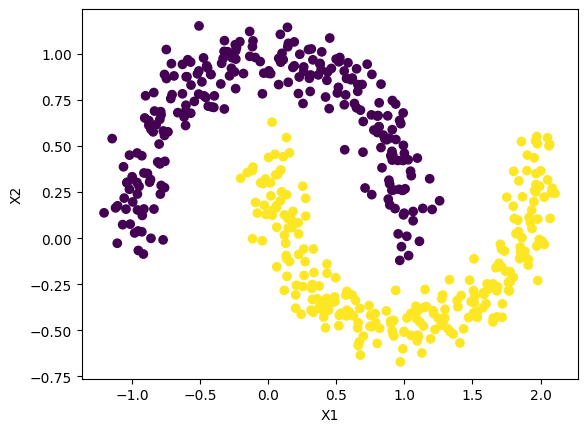

In [26]:
plt.scatter(X[:,0],X[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')

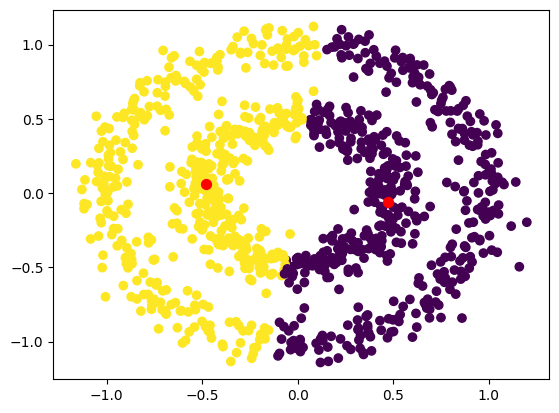

In [54]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
plt.scatter(X[:,0], X[:,1], c=kmeans.fit_predict(X))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

This is a good example of non-convex shaped clusters and why k-means may not be the best choice for this.

## DBSCAN

In [55]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.15, min_samples=5)
pred_labels = db.fit_predict(X)

In [56]:
pred_labels

array([ 0,  1,  1,  0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,
        0,  0,  0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,
        0,  0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,
        0,  1,  0,  0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,  0,
        0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,
        0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,
        1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  0,  0,  1,  0,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,
        0,  0,  1,  0,  0

So we did get 3 clusters (and the -1 are noise points).




In [57]:
sum(pred_labels == -1)

np.int64(1)

12 points are noise. Not too bad. (Depends on how you look at this)

In [58]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
n_noise_ = list(pred_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 1


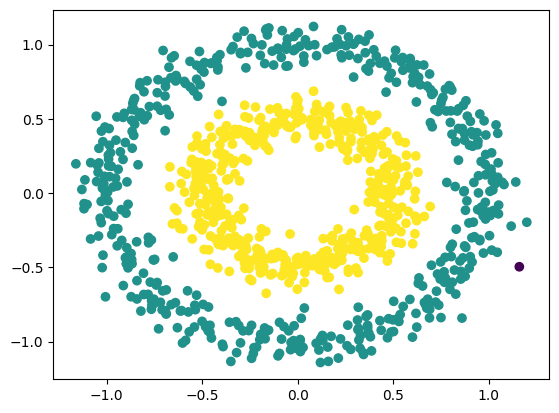

In [59]:
plt.scatter(X[:,0], X[:,1], c=pred_labels)

In [60]:
from sklearn.datasets import make_circles
X, cluster_labels = make_circles(n_samples=1000,noise = 0.08, factor=0.5) # Make a large circle containing a smaller circle in 2d.

Text(0, 0.5, 'X2')

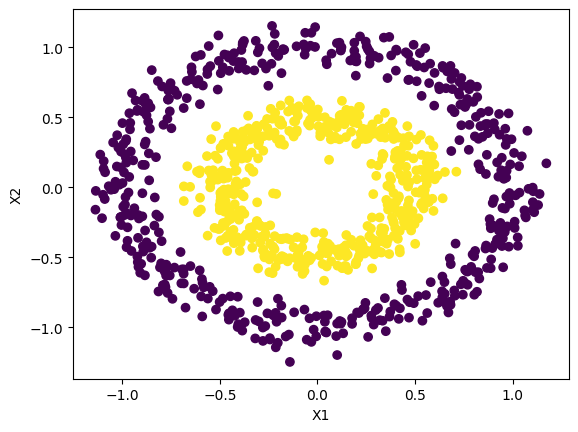

In [61]:
plt.scatter(X[:,0],X[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')

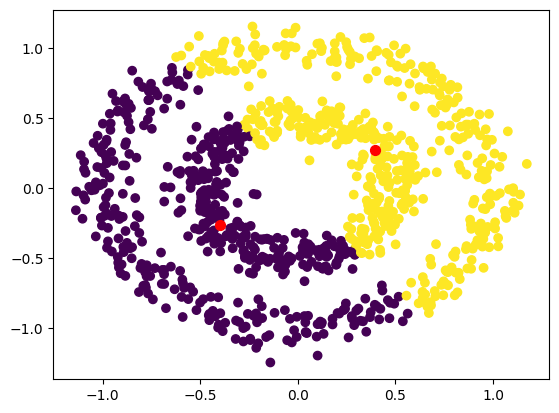

In [62]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
plt.scatter(X[:,0], X[:,1], c=kmeans.fit_predict(X))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [63]:
db = DBSCAN(eps=0.11, min_samples=6).fit(X) # You only want to fit the model to data without immediately getting cluster labels.

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 11


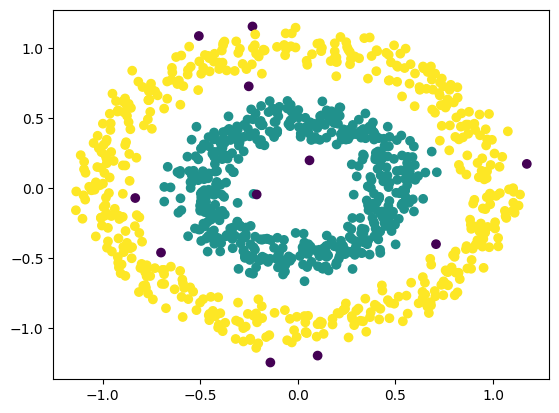

In [64]:
plt.scatter(X[:,0], X[:,1], c=labels)

In [65]:
D, cluster_labels = make_blobs(n_samples = 500, centers=[[0,0], [1,1]], cluster_std=[0.2, 0.4], random_state=0)

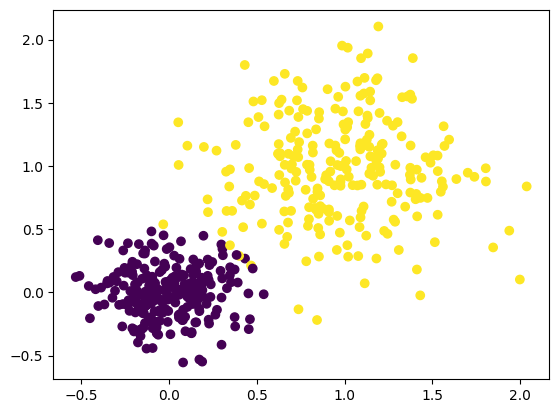

In [66]:
plt.scatter(D[:,0], D[:,1], c=cluster_labels)

In [67]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
pred_cluster_labels = kmeans.fit_predict(D)

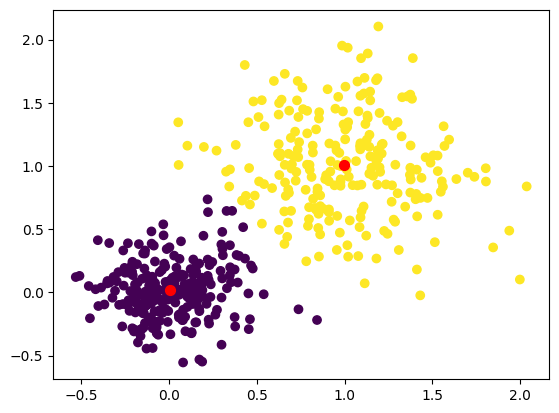

In [68]:
plt.scatter(D[:,0], D[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [70]:
db = DBSCAN(eps=0.15, min_samples=8).fit(D)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 61


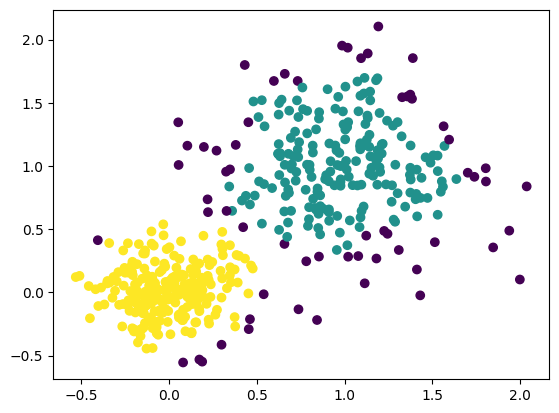

In [71]:
plt.scatter(D[:,0], D[:,1], c=labels)

**Q: Why do you think this does not give the best possible clustering?**

Let's run this on a real dataset.

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

iris_data = load_iris()
D = iris_data['data']
labels = iris_data['target']
n_labels = len(set(labels))
n_labels

3

In [73]:
dbs = DBSCAN(eps=.3, min_samples=5)
pred_labels = dbs.fit_predict(D)
pred_labels

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2])

So we did get 3 clusters (and the -1 are noise points). But, recall the lables on the iris dataset:



In [74]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
sum(pred_labels == -1)

np.int64(96)

There are 150 data instances in the iris dataset and we are predicting that 96 of them are noise.

But,Let's try different parameters.

Since we have a lot of noise points, that means our neighborhoos are too sparse. 

**Question** So, what happens if we fix the number of neighbors but make the size of the neighborhood larger?

In [77]:
dbs = DBSCAN(eps=.5, min_samples=5)
pred_labels = dbs.fit_predict(D)

print("Num clusters", max(pred_labels)+1)
print("Num noise", sum(pred_labels == -1))
print("labels", pred_labels)

Num clusters 2
Num noise 17
labels [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


**Iris dataset is 4D so we cannot plot this dataset.**

What if we project the dataset into lower dimension and run clustering?
Let's try to run PCA and capture at least 95% of the variance.

Text(0, 0.5, 'f(r) : fraction of total variance preserved')

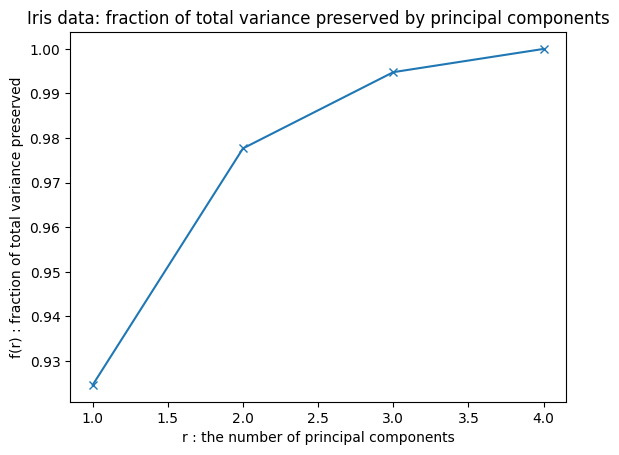

In [78]:
from sklearn.decomposition import PCA
pca = PCA()

D_pca = pca.fit_transform(D)
var_ratio = pca.explained_variance_ratio_
plt.plot(range(1,len(var_ratio)+1), np.cumsum(var_ratio), marker='x')
plt.title('Iris data: fraction of total variance preserved by principal components')
plt.xlabel('r : the number of principal components')
plt.ylabel('f(r) : fraction of total variance preserved')

We can see fro the plot that with even 2 components, we have ~98% of the variance. So let's use those. But before we grab those two dimensions, let's review a few ideas. First, let's look at the first two dimensions

Text(0, 0.5, 'X2')

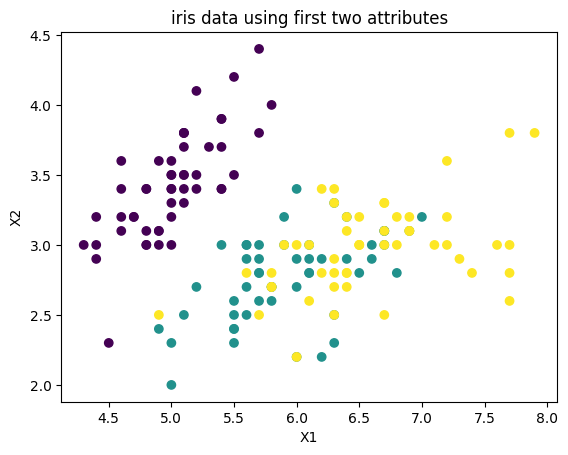

In [79]:
plt.scatter(D[:,0], D[:,1], c=labels)
plt.title('iris data using first two attributes')
plt.xlabel('X1')
plt.ylabel('X2')

Let's try to run this with the first 2 principal components.

Text(0, 0.5, 'PC2')

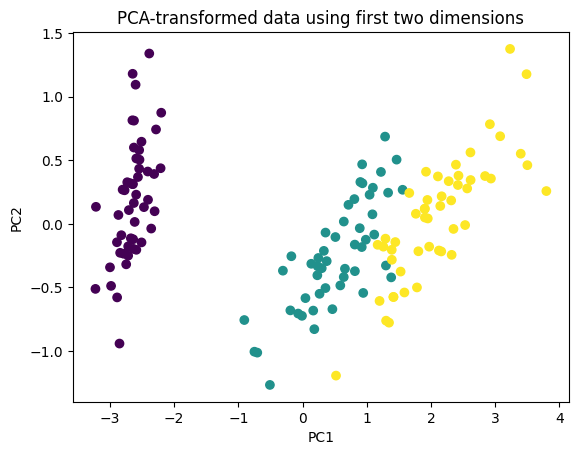

In [80]:
D2_pca = D_pca[:,0:2]
plt.scatter(D2_pca[:,0], D2_pca[:,1], c=labels)
plt.title('PCA-transformed data using first two dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

Let's see what happens if we run K-means

Text(0, 0.5, 'PC2')

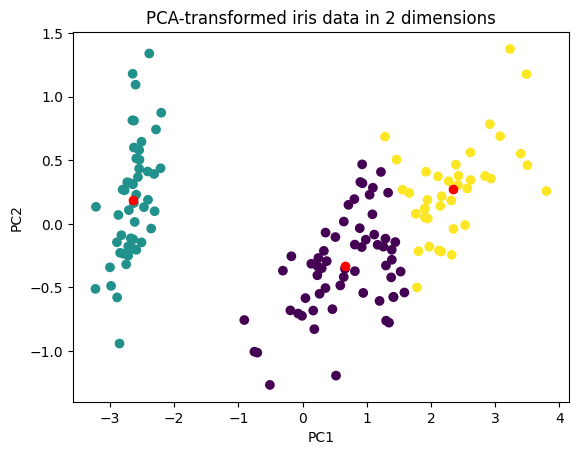

In [82]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(D2_pca)

center = kmeans.cluster_centers_
plt.scatter(D2_pca[:,0], D2_pca[:,1], c=pred_labels)
plt.scatter(center[:, 0], center[:,1], c='red') # Plotting the center
plt.title('PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

So the centers look pretty good, but since the clusters are not "ball shaped" (they are more ellipsoidal, we get some points in the wrong cluster. Ok, so let's try DBSCAN

Text(0, 0.5, 'PC2')

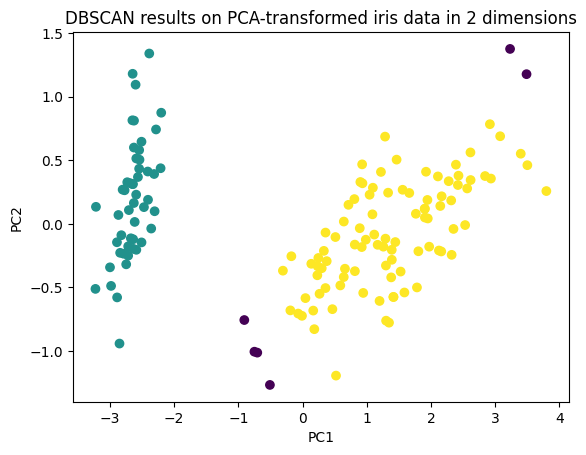

In [83]:
dbs = DBSCAN(eps=0.6, min_samples=5)
pred_labels = dbs.fit_predict(D2_pca)
plt.scatter(D2_pca[:,0], D2_pca[:,1], c=pred_labels)
plt.title('DBSCAN results on PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

Does not look good!!!

Two of the clusters were merged into one.

Also we got some noise points as well.

Let's try some different parameters.

Text(0, 0.5, 'PC2')

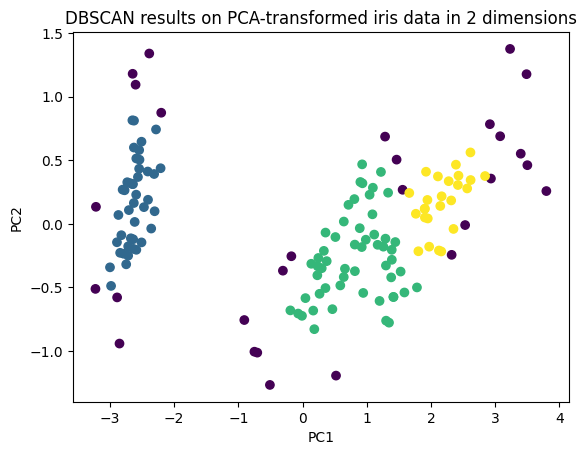

In [84]:
dbs = DBSCAN(eps=0.25, min_samples=5)
pred_labels = dbs.fit_predict(D2_pca)
plt.scatter(D2_pca[:,0], D2_pca[:,1], c=pred_labels)
plt.title('DBSCAN results on PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

Seems to be bit better.

What if we try even smaller neighborhood?

Text(0, 0.5, 'PC2')

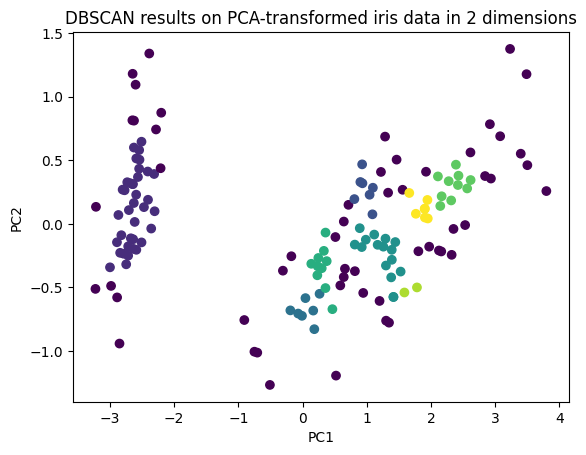

In [85]:
dbs = DBSCAN(eps=0.2, min_samples=5)
pred_labels = dbs.fit_predict(D2_pca)
plt.scatter(D2_pca[:,0], D2_pca[:,1], c=pred_labels)
plt.title('DBSCAN results on PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

That's worse. 

May be we tried a radius value too small.

It turns out, in this representation, the iris data set is not seperable, which means we cannot draw a planer curve that separates the two classes, which means in this rep, we will not be able to do well with DBSCAN.